<a href="https://colab.research.google.com/gist/fcursino/4c96bd84f85ed044f76aa74c369eeebe/untitled3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## 1. Importação de bibliotecas

In [0]:
import xlrd
import pandas as pd
import matplotlib.pyplot as plt

1.2. Criação de um dataframe

In [0]:
df2 = pd.read_excel('/content/drive/My Drive/STG_MDL.xlsx')
df1 = pd.read_excel('/content/drive/My Drive/STG_OPR_ITT.xlsx')

## 2. Comformidade quanto aos códigos de modalidade válidos

2.1. Criação de uma lista dos códigos de modalidade

In [0]:
lista = []
for i in range(len(df2)):
  a = df2.COD_MDL[i]
  lista.append(a)

In [9]:
lista

['E02',
 'B99',
 'D01',
 'G01',
 'A02',
 'A04',
 'E01',
 'B03',
 'B02',
 'A05',
 'B04',
 'B07',
 'F01',
 'B06',
 'C01',
 'A01',
 'B05',
 'A99',
 'B01']

2.2. Verificação da tabela STG_OPR_ITT contém os códigos de modalidade

In [0]:
conf = len(df1.loc[df1['ID_MDL'].isin(lista)])

In [11]:
#Verificação da quantidade de registros que possuem o código de modalidade válido.
conf

891

2.3. Verificação da quantidade de registros da tabela STG_OPR_ITT

In [0]:
total = len(df1)

In [13]:
total

891

2.4. Verificação de % de registros conforme baseado nos códigos de modalidade

In [0]:
n_conforme= (total-conf) *100/total
conforme = 100 - n_conforme

In [15]:
conforme

100.0

In [16]:
n_conforme

0.0

2.5. Representação Gráfica

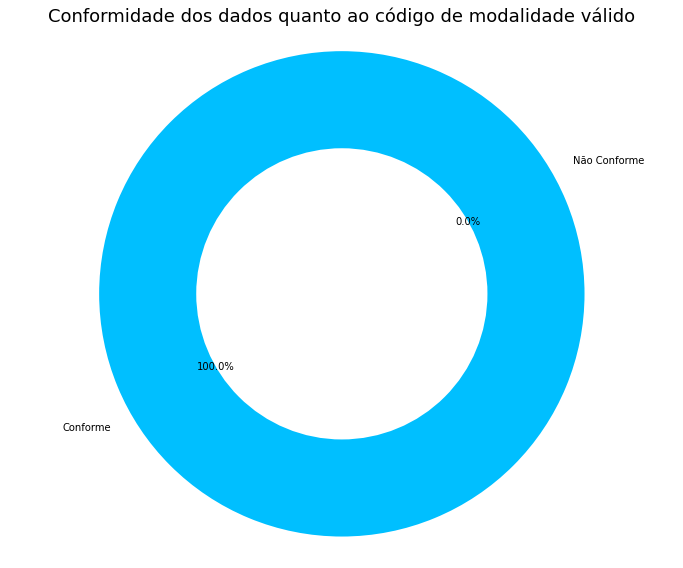

In [17]:
labels = ['Conforme', 'Não Conforme']
sizes = [conforme, n_conforme]

colors = ['DeepSkyBlue','#00BFFF']
 
fig2, ax1 = plt.subplots(figsize = (10,8))
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=30)

centre_circle = plt.Circle((0,0),0.60,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Conformidade dos dados quanto ao código de modalidade válido', fontsize = 18)

ax1.axis('equal')  
plt.tight_layout()
plt.show()

## 3. Verificação se o campo DES_TIP_PSS está preenchido dentro do padrão

3.1. Criação de uma lista para verificação de padrão

In [0]:
## Criação de uma lista para verificar existência de registros no padrão F(Pessoa Física)  e J(Pessoa Jurídica)
listafjM=['F','J']

## Criação de lista para verificação existência de registros fora do padrão f e j ( letras minúsculas)
listafjm=['f','j']

In [19]:
listafjM, listafjm

(['F', 'J'], ['f', 'j'])

In [0]:
## Atribuição a uma variável os números de registros válidos com F e J
conffjM =len(df1.loc[df1['DES_TIP_PSS'].isin(listafjM)])

## Atribuição a uma variável os números de registros fora do padrão f e j (letras minúsculas) 
conffjm =len(df1.loc[df1['DES_TIP_PSS'].isin(listafjm)])

In [21]:
conffjM , conffjm

(891, 0)

3.2 Cálculo de porcentagem de dados conforme e não conforme quanto à Pessoa Física ou Jurídica

In [0]:
FJ = conffjM *100/total
fj = conffjm*100/total
difFJ = (total-conffjM)*100/total

3.3 Representação Gráfica

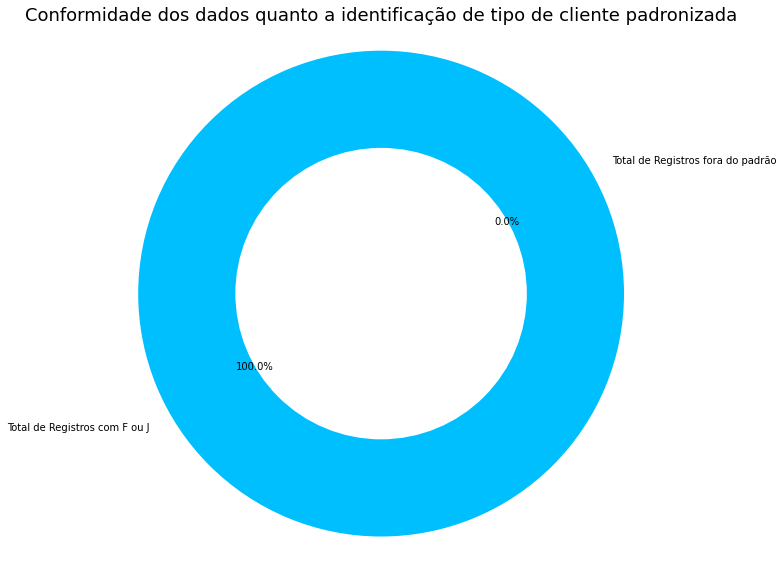

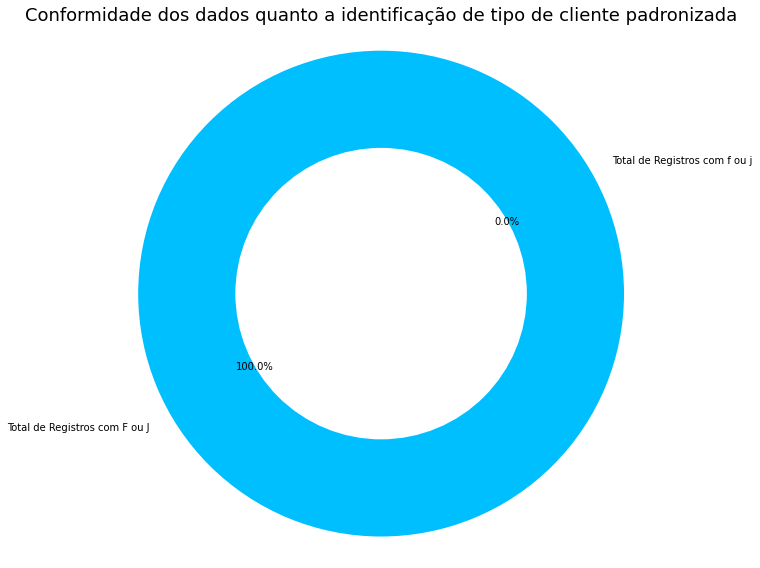

In [23]:
labels = ['Total de Registros com F ou J', 'Total de Registros fora do padrão']
sizes = [FJ, difFJ]

colors = ['DeepSkyBlue','#00BFFF']
 
fig2, ax1 = plt.subplots(figsize = (10,8))
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=30)

centre_circle = plt.Circle((0,0),0.60,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Conformidade dos dados quanto a identificação de tipo de cliente padronizada', fontsize = 18)

ax1.axis('equal')  
plt.tight_layout()
plt.show()



labels = ['Total de Registros com F ou J', 'Total de Registros com f ou j']
sizes = [FJ, fj]

colors = ['DeepSkyBlue','#00BFFF']
 
fig2, ax1 = plt.subplots(figsize = (10,8))
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=30)

centre_circle = plt.Circle((0,0),0.60,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Conformidade dos dados quanto a identificação de tipo de cliente padronizada', fontsize = 18)

ax1.axis('equal')  
plt.tight_layout()
plt.show()

## 4. Verificação do campo ID_FNT_ITT da tabela STG_PGT se está de acordo com a tabela STG_FNT_ITT

4.1. Criação de um dataframe da tabela STG_FNT_ITT, para verificação de fontes válidas

In [0]:
df3 = pd.read_excel('/content/drive/My Drive/STG_FNT_ITT.xlsx')

4.2. Criação de uma lista das fontes existentes

In [0]:
listafontes=[]
for i in range (len(df3)):
    a= df3.ID_STG_FNT_ITT[i]
    listafontes.append(a)

4.3. Verficação da tabela STG_PGT contém fontes válidas

In [0]:
conf_fontes =len(df1.loc[df1['ID_FNT_ITT'].isin(listafontes)])

In [28]:
conf_fontes

891


4.4. Verificação de % registros conforme baseado na identificação de fonte válidas

In [0]:
fontes = conf_fontes *100/total
fontesnconf = (total-conf_fontes)*100/total

4.5. Representação Gráfica

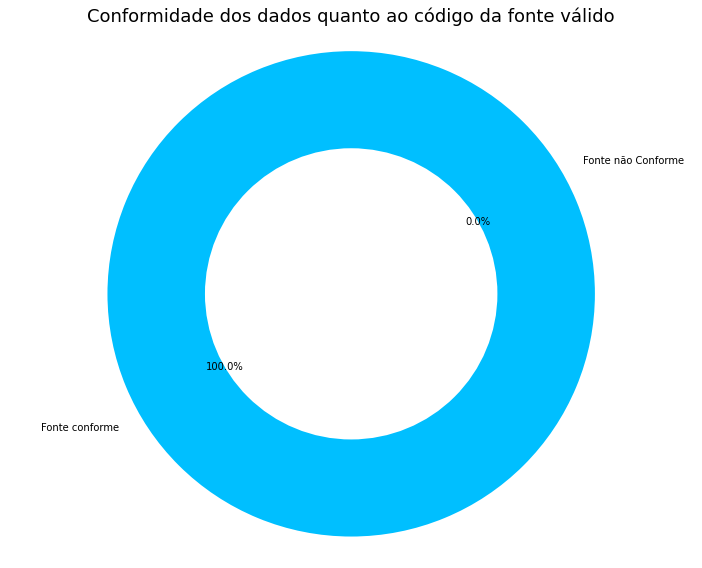

In [30]:
labels = ['Fonte conforme', 'Fonte não Conforme']
sizes = [fontes, fontesnconf]

colors = ['DeepSkyBlue','#00BFFF']
 
fig2, ax1 = plt.subplots(figsize = (10,8))
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=30)

centre_circle = plt.Circle((0,0),0.60,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Conformidade dos dados quanto ao código da fonte válido', fontsize = 18)

ax1.axis('equal')  
plt.tight_layout()
plt.show()

## 5. Verificação da relação entre os campos QTD_OPR e QTD_CLI_CAD_POS (quantidade de operações ser maior ou igual a quantidade de clientes)

5.1. Verificação da relação padrão entre os campos

In [0]:
rel_conforme = 0
rel_n_conforme = 0
for i in range(len(df1)):
  if df1.QTD_OPR[i] >= df1.QTD_CLI_CAD_POS[i]:
    rel_conforme = rel_conforme +1
  else:
    rel_n_conforme = rel_n_conforme +1
  

5.2. Verificação de porcentagem de registros com relações conforme e não conforme

In [0]:
rel_n_conforme = (rel_conforme - total) *100/total
rel_conforme = rel_conforme *100/total


5.3. Representação Gráfica

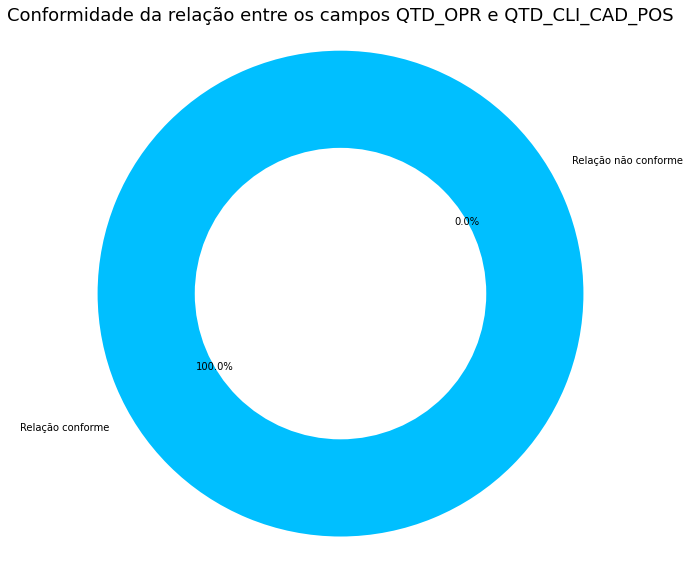

In [45]:
labels = ['Relação conforme', 'Relação não conforme']
sizes = [rel_conforme, rel_n_conforme]

colors = ['DeepSkyBlue','#00BFFF']
 
fig2, ax1 = plt.subplots(figsize = (10,8))
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=30)

centre_circle = plt.Circle((0,0),0.60,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Conformidade da relação entre os campos QTD_OPR e QTD_CLI_CAD_POS', fontsize = 18)

ax1.axis('equal')  
plt.tight_layout()
plt.show()

## 6. Alteração de formato dos campos VLR_CTRD_CSC e VLR_SDO_DDR

6.1. Alterando formato string para float nos campos VLR_CTRD_CSC e VLR_SDO_DDR

In [0]:
df1.VLR_CTRD_CSC = df1.VLR_CTRD_CSC.astype(float)
df1.VLR_SDO_DDR = df1.VLR_SDO_DDR.astype(float)

6.2. Salvando o dataframe alterado em um novo arquivo xlsx

In [0]:
df1.to_excel("STG_OPR_ITT_Novo.xlsx")